In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
df = pd.read_csv('../../dataset/train.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../dataset/train.csv'

In [4]:
df.drop(['id'], axis=1, inplace=True)

### Convert Categorical Features

In [5]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

df.loc[df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df.loc[df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df.loc[df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

df.loc[df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df.loc[df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1


Pertama kita akan melakukan pengecekan korelasi masing-masing feature

C:\Users\Christofer Bryan\AppData\Local\Temp\ipykernel_24768\1698578797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

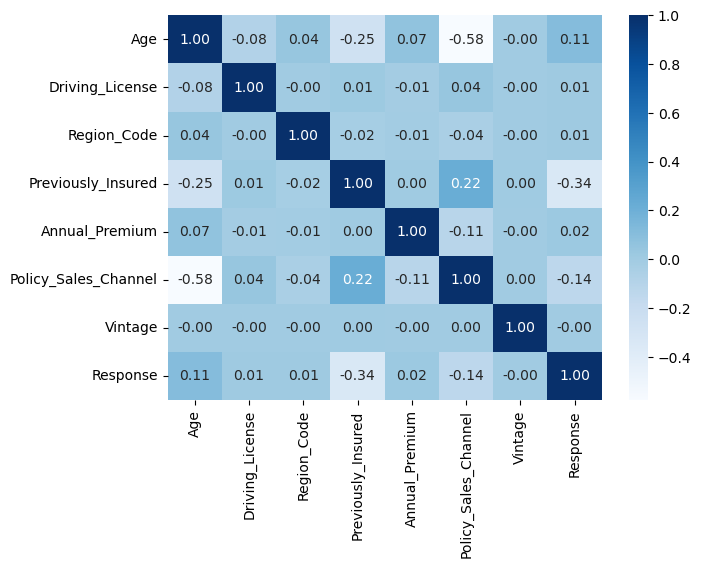

In [6]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat bahwa terdapat beberapa fitur yang tidak memiliki korelasi yang tinggi dengan korelasi dibawah 10% yaitu:

- Gender
- Driving_License
- Region_Code
- Annual_Premium
- Vintage  

## Feature Transformation

### Region Code

Region code memang merupakan fitur numerik namun feature ini merupakan numerik kategorikal. Maka dari itu fitur ini harus diberikan perlakuan khusus seperti label encoding dengan ranking yang jelas agar numerik pada fitur ini memiliki korelasi yang jelas dengan target.

In [7]:
region_df = df.groupby('Region_Code').agg({
    'Response': ['mean', 'count']
}).reset_index()

region_df_sorted = region_df.sort_values(by=('Response', 'mean'), ascending=True)

region_df_sorted = region_df_sorted.reset_index(drop=True)

region_df_sorted.head()

Region_Code  Response       
                   mean  count
0        44.0  0.040842    808
1        25.0  0.042749   2503
2        10.0  0.060128   4374
3        50.0  0.062677  10243
4        22.0  0.063407   1309

In [9]:
region_category_dict = dict(zip(region_df_sorted['Region_Code'], region_df_sorted.index + 1))

df['Region_Code'] = df['Region_Code'].map(region_category_dict)
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,52,0,2,1,40454.0,26.0,217,1
1,1,76,1,44,0,1,0,33536.0,26.0,183,0
2,1,47,1,52,0,2,1,38294.0,26.0,27,1


C:\Users\Christofer Bryan\AppData\Local\Temp\ipykernel_24768\1698578797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

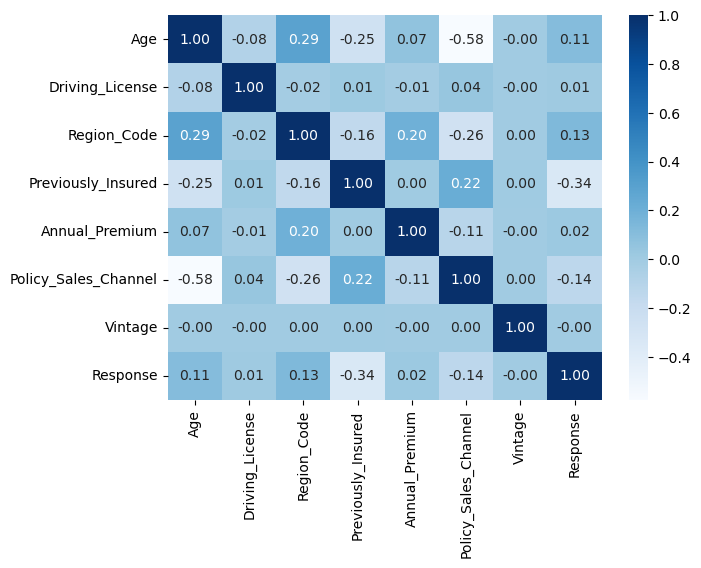

In [11]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat setelah feature transformation dilakukan, sekarang regional code sudah memiliki korelasi yang lebih tinggi daripada sebelumnya

### Policy Sales Channel

In [12]:
policy_df = df.groupby('Policy_Sales_Channel').agg({
    'Response': ['mean', 'count']
}).reset_index()

policy_df['Weighted_Mean'] = policy_df['Response']['mean'] * policy_df['Response']['count']

policy_df_sorted = policy_df.sort_values(by=('Response', 'mean'), ascending=True)

policy_df_sorted = policy_df_sorted.reset_index(drop=True)

policy_df_sorted.head()

Policy_Sales_Channel Response       Weighted_Mean
                           mean count              
0                 99.0      0.0     7           0.0
1                 79.0      0.0     6           0.0
2                 46.0      0.0    16           0.0
3                112.0      0.0     2           0.0
4                105.0      0.0     3           0.0

In [14]:
policy_category_dict = dict(zip(policy_df_sorted['Policy_Sales_Channel'], policy_df_sorted.index + 1))

df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].map(policy_category_dict)
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,52,0,2,1,40454.0,126,217,1
1,1,76,1,44,0,1,0,33536.0,126,183,0
2,1,47,1,52,0,2,1,38294.0,126,27,1


C:\Users\Christofer Bryan\AppData\Local\Temp\ipykernel_24768\1698578797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

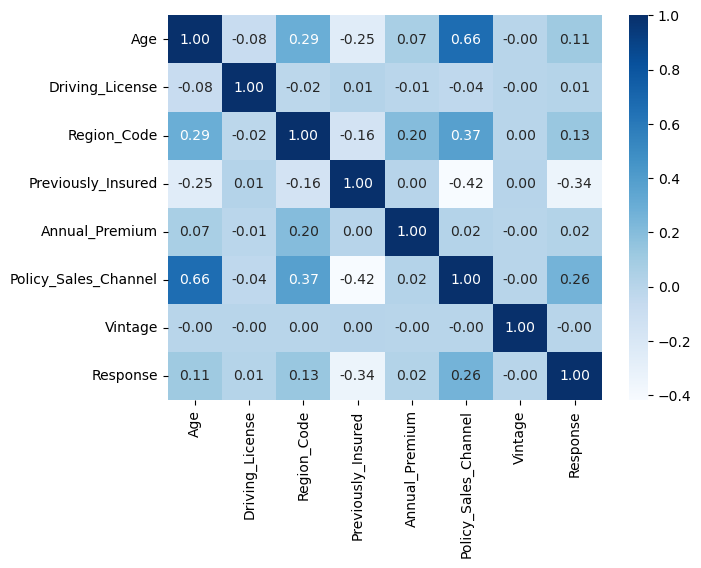

In [16]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat setelah feature transformation dilakukan, sekarang policy sales channel sudah memiliki korelasi yang lebih tinggi daripada sebelumnya

## Feature Extraction

### Age Bin

Feature Extraction akan dilakukan pada fitur age dengan membaginya menjadi beberapa bins sesuai dengan quantiles = 5

In [17]:
df['Age_Bin'], bin_edges = pd.qcut(df['Age'], q=5, labels=False, retbins=True)

print("Bin Edges:", bin_edges)

Bin Edges: [20. 24. 29. 42. 53. 85.]


In [19]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Bin,Response
0,1,44,1,52,0,2,1,40454.0,126,217,3,1
1,1,76,1,44,0,1,0,33536.0,126,183,4,0
2,1,47,1,52,0,2,1,38294.0,126,27,3,1
3,1,21,1,35,1,0,0,28619.0,38,203,0,0
4,0,29,1,39,1,0,0,27496.0,38,39,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,12,1,1,0,30170.0,126,88,4,0
381105,1,30,1,18,1,0,0,40016.0,38,131,2,0
381106,1,21,1,13,1,0,0,35118.0,36,161,0,0
381107,0,68,1,25,0,2,1,44617.0,120,74,4,0


C:\Users\Christofer Bryan\AppData\Local\Temp\ipykernel_24768\228956929.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

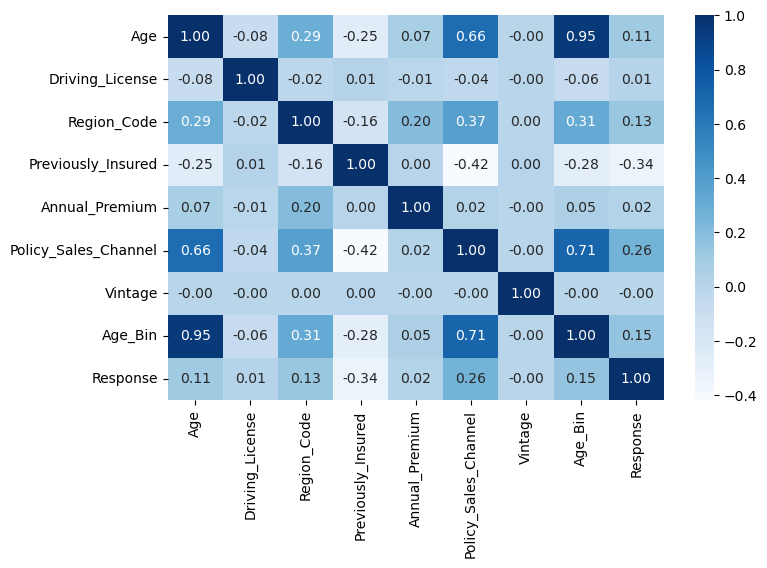

In [20]:
df['Response'] = df.pop('Response')

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat bahwa Age_Bin memiliki korelasi terhadap response yang lebih tinggi dibandingkan age

### Gender Category (Age and Gender)

Gender Category akan melakukan penggabungan fitur dari Age dan Gender guna memberikan gambaran yang lebih mendalam tentang kedua fitur ini

In [21]:
import numpy as np

conditions = [
    # Male
    (df['Gender'] == 1) & (df['Age'] <= 25),
    (df['Gender'] == 1) & ((25 < df['Age']) & (df['Age'] < 45)),
    (df['Gender'] == 1) & ((45 <= df['Age']) & (df['Age'] < 65)),
    (df['Gender'] == 1) & (df['Age'] >= 65),

    # Female
    (df['Gender'] == 0) & (df['Age'] <= 25),
    (df['Gender'] == 0) & ((25 < df['Age']) & (df['Age'] < 45)),
    (df['Gender'] == 0) & ((45 <= df['Age']) & (df['Age'] < 65)),
    (df['Gender'] == 0) & (df['Age'] >= 65),
]

categories = [
    # Male
    'young_male', 
    'mature_male', 
    'senior_male', 
    'elderly_male',
    
    # Female
    'young_female', 
    'mature_female', 
    'senior_female', 
    'elderly_female'
]

df['Gender_Category'] = np.select(conditions, categories, default='Unknown')
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Bin,Response,Gender_Category
0,1,44,1,52,0,2,1,40454.0,126,217,3,1,mature_male
1,1,76,1,44,0,1,0,33536.0,126,183,4,0,elderly_male
2,1,47,1,52,0,2,1,38294.0,126,27,3,1,senior_male
3,1,21,1,35,1,0,0,28619.0,38,203,0,0,young_male
4,0,29,1,39,1,0,0,27496.0,38,39,1,0,mature_female


Selanjutnya setelah melakukan feature extraction, ranking dari Gender Category akan dilakukan dengan mengurutkan mean response dari masing-masing kategori untuk dictionary label encoding yang akan dilakukan

In [23]:
result_df = df.groupby('Gender_Category').agg({
    'Response': ['mean', 'count']
}).reset_index()

result_df_sorted = result_df.sort_values(by=('Response', 'mean'), ascending=True)
result_df_sorted = result_df_sorted.reset_index(drop=True)
result_df_sorted

Gender_Category  Response       
                       mean  count
0    young_female  0.028967  64074
1      young_male  0.043445  50431
2  elderly_female  0.082267  12739
3    elderly_male  0.088958  18121
4   mature_female  0.145943  62675
5   senior_female  0.172633  35532
6     mature_male  0.173212  71981
7     senior_male  0.186924  65556

In [24]:
gender_category_dict = dict(zip(result_df_sorted['Gender_Category'], result_df_sorted.index + 1))

In [25]:
df['Gender_Category'] = df['Gender_Category'].map(gender_category_dict)
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Bin,Response,Gender_Category
0,1,44,1,52,0,2,1,40454.0,126,217,3,1,7
1,1,76,1,44,0,1,0,33536.0,126,183,4,0,4
2,1,47,1,52,0,2,1,38294.0,126,27,3,1,8


<Axes: >

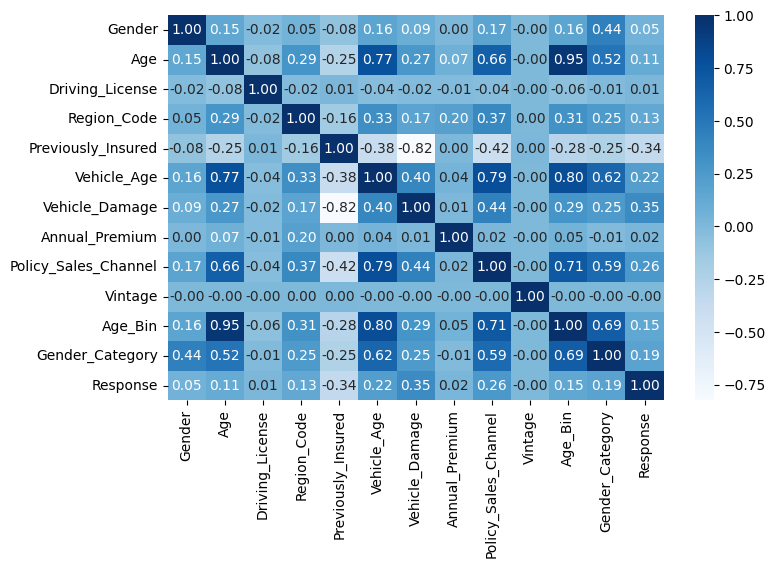

In [529]:
df['Response'] = df.pop('Response')

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat, bahwa hasil feature extraction yaitu Gender_Category memiliki korelasi yang lebih tinggi dari Gender dan Age

### Age and Vehicle Age

Feature Extraction akan dilakukan terhadap Age dan Vehicle age dengan mengalikan Age Bin dan Vehicle Age

In [33]:
df['Age_Vehicle_Age_Interaction'] = df['Age_Bin'] * df['Vehicle_Age']

C:\Users\Christofer Bryan\AppData\Local\Temp\ipykernel_24768\3348038669.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

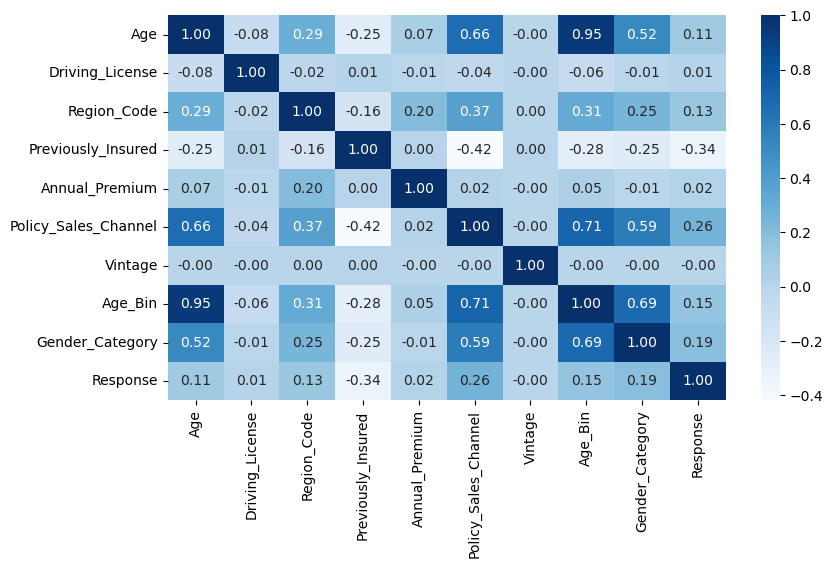

In [34]:
df['Response'] = df.pop('Response')

plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [35]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Bin,Gender_Category,Age_Vehicle_Age_Interaction,Response
0,1,44,1,52,0,2,1,40454.0,126,217,3,7,6,1
1,1,76,1,44,0,1,0,33536.0,126,183,4,4,4,0
2,1,47,1,52,0,2,1,38294.0,126,27,3,8,6,1
3,1,21,1,35,1,0,0,28619.0,38,203,0,2,0,0
4,0,29,1,39,1,0,0,27496.0,38,39,1,5,0,0


Feature Extraction akan dilakukan terhadap Age dan Vehicle age dengan mengalikan Age Bin dan Vehicle Damage untuk mendapatkan interaction antara Age dan Vehicle Damage.

In [36]:
df['Vehicle_Damage_Age_Interaction'] = df['Age_Bin'] * df['Vehicle_Damage']

C:\Users\Christofer Bryan\AppData\Local\Temp\ipykernel_24768\3068380905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

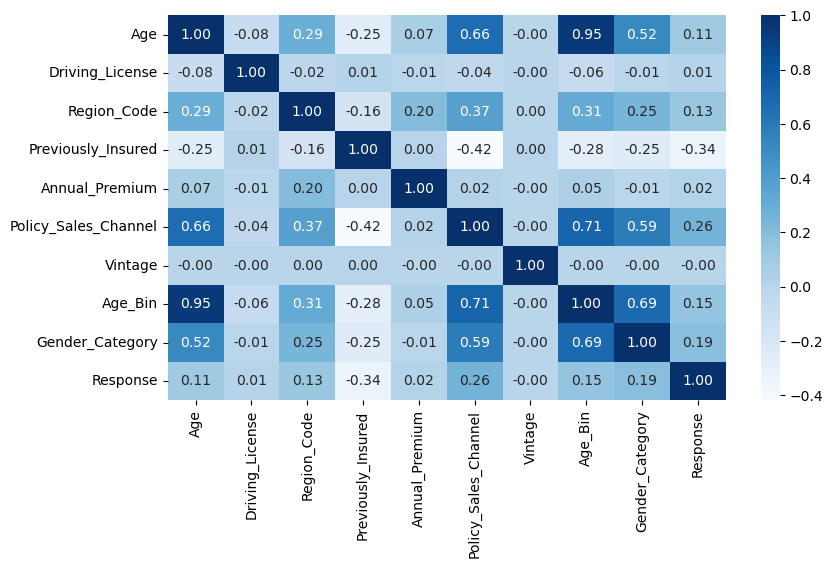

In [37]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [38]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Bin,Gender_Category,Age_Vehicle_Age_Interaction,Response,Vehicle_Damage_Age_Interaction
0,1,44,1,52,0,2,1,40454.0,126,217,3,7,6,1,3
1,1,76,1,44,0,1,0,33536.0,126,183,4,4,4,0,0
2,1,47,1,52,0,2,1,38294.0,126,27,3,8,6,1,3
3,1,21,1,35,1,0,0,28619.0,38,203,0,2,0,0,0
4,0,29,1,39,1,0,0,27496.0,38,39,1,5,0,0,0
